# Titanic Dataset
This dataset is widely used as a startup guide for data science due to it simplicity and also feature rich data variation.
Maybe you had read the article regarding data exploration or machine learning on using this dataset before, but I hope
you not mind to continue the journey with me.

### Data Dictionary
- survival    -> Survival     ->  	0 = No, 1 = Yes
- pclass      -> Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd
- sex         -> Sex
- Age         -> Age in years
- sibsp       -> # of siblings / spouses aboard the Titanic
- parch       -> # of parents / children aboard the Titanic
- ticket      -> Ticket number
- fare        -> Passenger fare
- cabin       -> Cabin number
- embarked    -> Port of Embarkation  -> C = Cherbourg, Q = Queenstown, S = Southampton

## Exploring Data
Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (NIST, 2022) 

## Load Library

In [2]:
# Import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 


## Load Data and Perform Data Checking

In [3]:
df = pd.read_csv("dataset/titanic.csv")
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## Graph Ploting
Define a bar graph plotting function

In [13]:
def bar_plot(dataframe,variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = dataframe[variable]
    
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()

Visualize the information for columns of Survived, Sex, Pclass, Embarked, SibSp and Parch.

- to compare the survived count
- to compare the ratio of male to female
- to compare the count of pclass
- to check out the distribution of number of the sibling
- to visualize the distribution of the parch

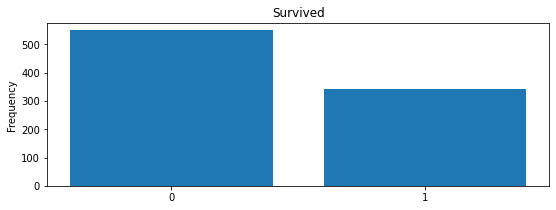

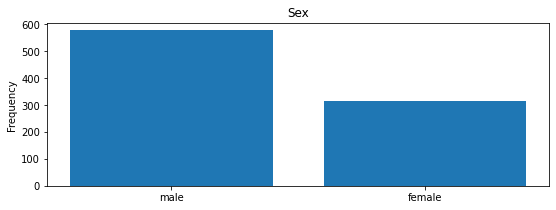

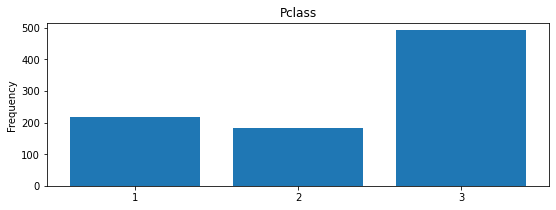

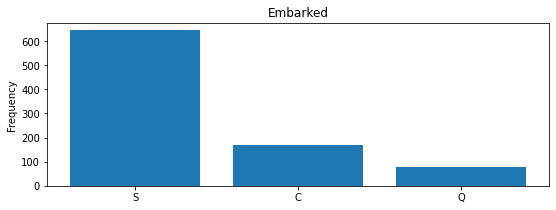

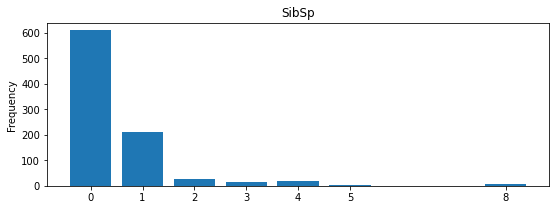

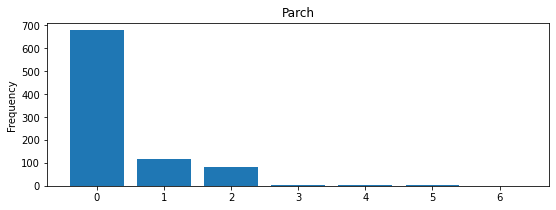

In [32]:
category1 = ["Survived" , "Sex" , "Pclass" , "Embarked" , "SibSp" , "Parch"]
for c in category1:
    bar_plot(df, c)

The count of survived is lower, and the number survived female is more than male.

## Investigating the Correlation

In [16]:
# create a tmp df
tmp = df[["Survived" , "Sex" , "Pclass" , "Embarked" , "SibSp" , "Parch"]]
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Pclass    891 non-null    int64 
 3   Embarked  889 non-null    object
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 41.9+ KB


In [29]:
corr = tmp.corr(method ='pearson')
corr


,Survived,Pclass,SibSp,Parch
Survived,1.000000,-0.338481,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.083081,0.018443
SibSp,-0.035322,0.083081,1.000000,0.414838
Parch,0.081629,0.018443,0.414838,1.000000


<AxesSubplot:>

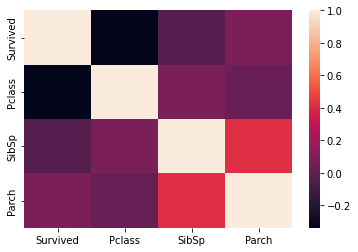

In [27]:
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [30]:
corr = tmp.corr(method ='kendall')
corr

,Survived,Pclass,SibSp,Parch
Survived,1.000000,-0.323533,0.085915,0.133933
Pclass,-0.323533,1.000000,-0.039552,-0.021019
SibSp,0.085915,-0.039552,1.000000,0.425241
Parch,0.133933,-0.021019,0.425241,1.000000


<AxesSubplot:>

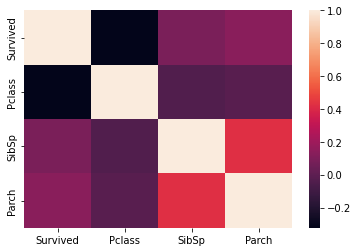

In [31]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [38]:
pclass_survived = df[["Pclass" , "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)
pclass_survived



,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [40]:
sex_survived = df[["Sex" , "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)
sex_survived


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [41]:
sibsp_survive = df[["SibSp" , "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by = "Survived", ascending = False) 
sibsp_survive

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [43]:
parch_survive = df[["Parch" , "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by = "Survived", ascending = False) 
parch_survive

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Outlier
In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses. 

To determine the outlier, we can use the interquatile range(IQR) to filter out the value that is not within the range. 

In [47]:
# function to calculate outlier
from collections import Counter

def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 =  np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #outlier step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices 
        outlier_indices.extend(outlier_list_col)
   
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers
            



In [48]:
detect_outliers(df,["Age","SibSp","Parch","Fare"]) # get the id of the outlier dataframe, the reason of choosing those columns is because IQR only applicable to int data

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [45]:
df.loc[detect_outliers(df,["Age","SibSp","Parch","Fare"])] # use built in loc function to locate the outlier data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Dropping out the outlier rows, since the affected rows isn't that much. But to solve this problem we also can make use of the minmaxscaler from sklearn.
MinMaxScaler is a function that transform features by scaling each feature to a given range.This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. The transformation is given by:

```py
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

In [50]:

df_1 = df.drop(detect_outliers(df,["Age", "SibSp","Parch","Fare"]), axis=0).reset_index(drop = True )


## Handling Missing Value


In [54]:
df_1.columns[df_1.isnull().any()] # checking the colmn that consist of null value, only the column that return true (for null ) will be display

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [55]:
df_1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [56]:
df_1.isnull().sum() # check the count of the missing value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

If possible to fill in the missing value will be better than dropping the data

In [57]:
df_1[df_1["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


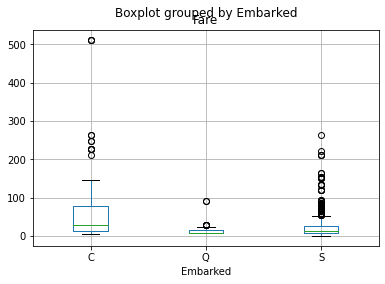

In [58]:
df_1.boxplot(column = "Fare" , by = "Embarked")
plt.show()

In [ ]:
# Since C is the most popular, hence let fill in C for Embarked missing value


df_1["Embarked"] = df_1["Embarked"].fillna("C")  # Boş olan değerlere C yazıldı.
df_1[df_1["Embarked"].isnull()]#

